**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   EQUIPO: 42
*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386
*   NOMBRE: Marco Antonio Corona Ruiz
*   MATRÍCULA: A01370358
*   NOMBRE: Emiliano Saucedo Arriola
*   MATRÍCULA: A01659258
*   NOMBRE: César Miguel Barrientos Robles
*   MATRÍCULA: A01796615

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/"
#DIR = "/content/drive/MyDrive/MNA/TC4029/Semana 8/"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
insurance_df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1b) Búsqueda de valores faltantes.

In [8]:
missing = insurance_df.isna().sum()
missing

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [9]:
def plot_hist(df, variables, rows, cols, width, height, plot_color):
    fig, axs = plt.subplots(rows, cols, figsize=(width, height))
    axs = axs.flatten()

    for col, ax in zip(variables, axs):
        bins = 5 if col == 'children' else 20
        sns.histplot(df[col], bins=bins, color=plot_color, edgecolor=None, ax=ax)
        ax.set(title=f'Histograma de {col}', xlabel=None, ylabel='Frecuencia')
        ax.legend()

    plt.tight_layout()
    plt.show()

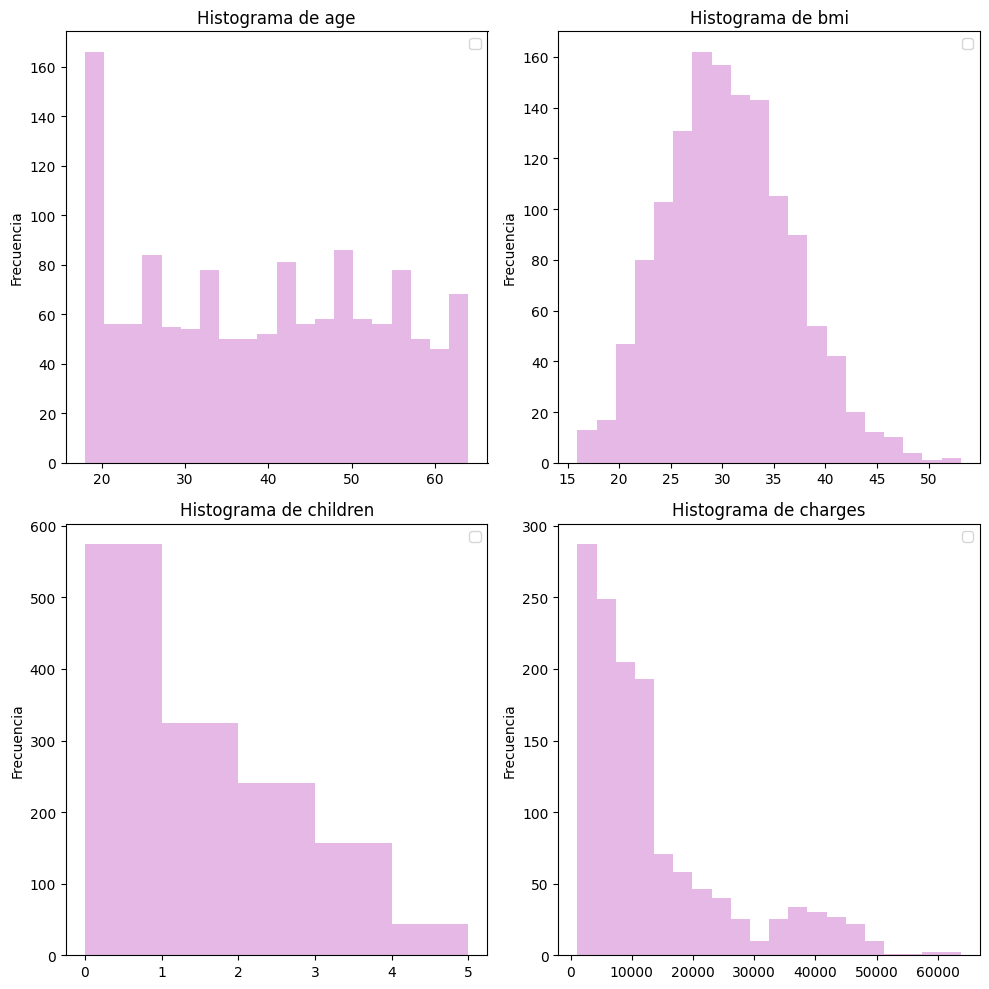

In [10]:
numerical_vars = list(insurance_df.select_dtypes(include=['number']).columns)
plot_hist(insurance_df, numerical_vars, rows=2, cols=2, width=10, height=10, plot_color='plum')

In [11]:
def plot_boxplots(df, variables, cols=2, width=12, height=6):
    rows = (len(variables) + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(width, height))
    axs = axs.flatten()

    for col, ax in zip(variables, axs):
        sns.boxplot(x=df[col], ax=ax, color='plum', showmeans=True)
        ax.set(title=f'Boxplot of {col}', xlabel=None)

    plt.tight_layout()
    plt.show()

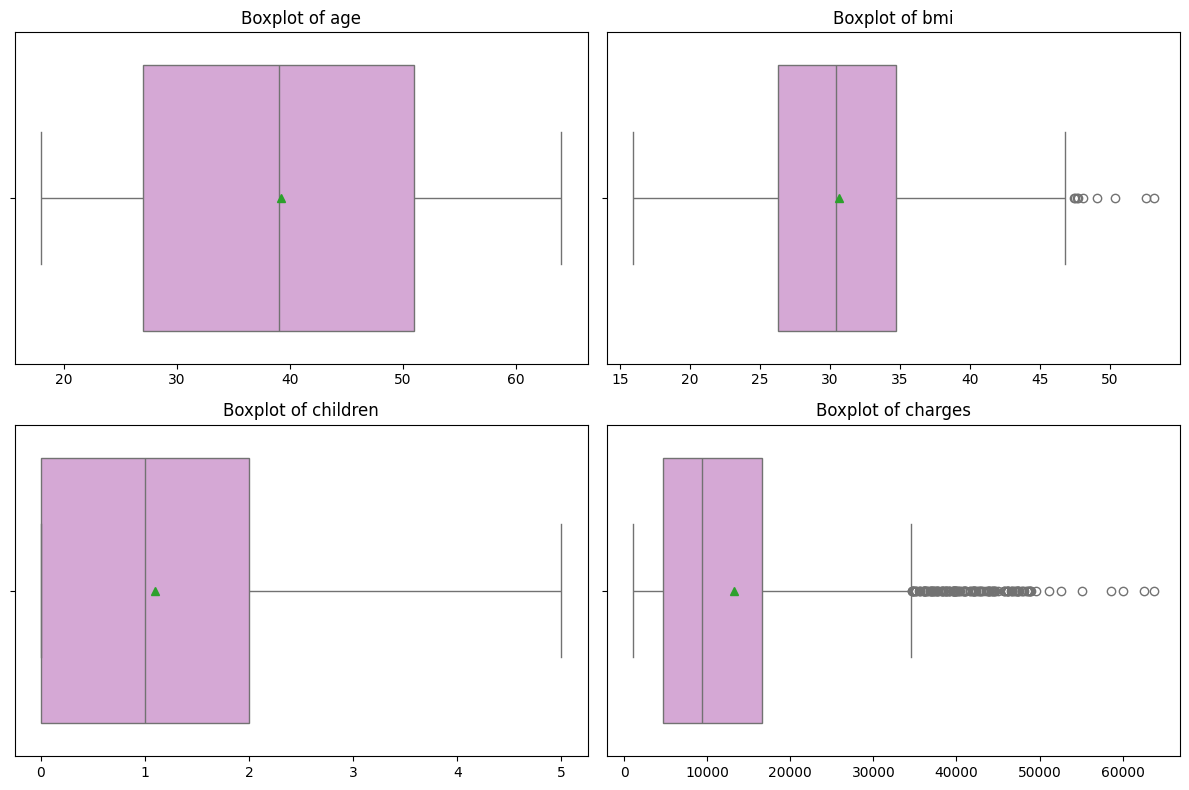

In [12]:
plot_boxplots(insurance_df, numerical_vars, cols=2, width=12, height=8)


**Observaciones**

**Edad (`age`)**:
- Se aprecia una distribución bastante uniforme y sin valores atípicos, lo que sugiere una población diversa en cuanto a edades, pero con una concentración alta alrededor de 20 años (adultos jóvenes).

**Índice de Masa Corporal (`BMI`)**:
- Visualmente parece tener una distribución normal, con una concentración entre 25 y 35 y un valor central cercano a 30 (mediana = 30.4).

**Hijos (`children`)**:
- La mayoría de los asegurados no tienen hijos. Conforme crece el número de hijos, la frecuencia disminuye exponencialmente.

**Primas (`charges`)**:
- La distribución presenta una asimetría positiva (hacia la derecha), mostrando una concentración de cargos en un rango bajo. No obstante, una cola alargada (histograma) y valores atípicos (boxplot) muestran la presencia de casos donde individuso incurren en costos demasiado altos, lo cual puede estar vinculado por diferentes factores de riesgo, tales como la edad o un BMI fuera del rango normal.


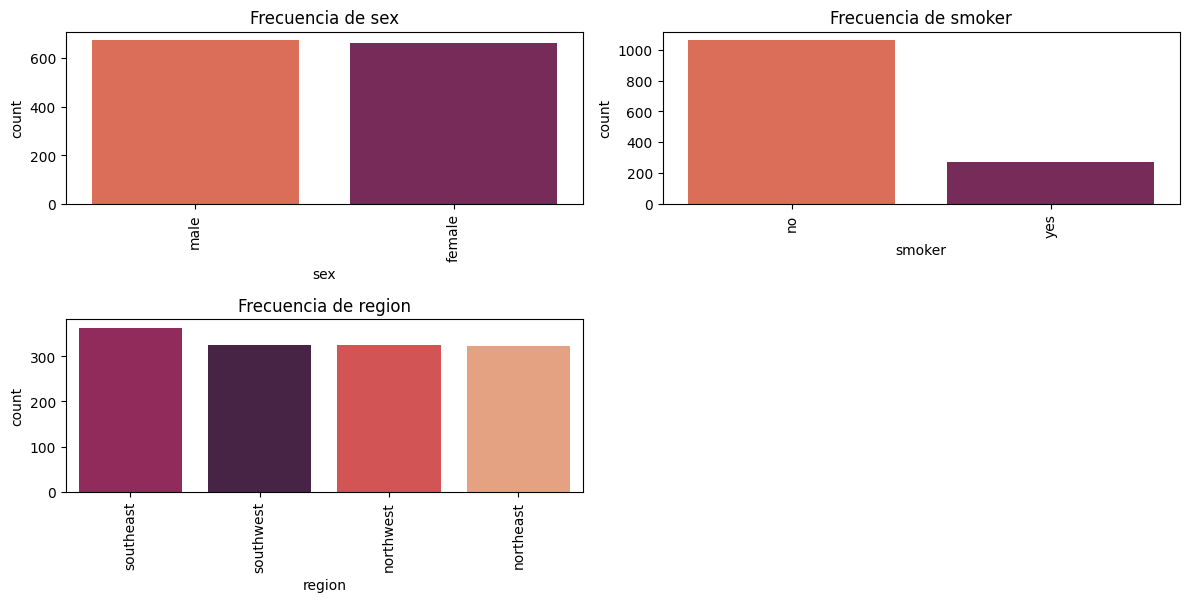

In [13]:
objects_df = insurance_df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(12, 8))

for i, col in enumerate(objects_df):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=insurance_df, x=col, order=insurance_df[col].value_counts().index, palette='rocket', hue=col)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=90)
    plt.legend([], [], frameon=False)  # Remove the legend for cleaner plots

plt.tight_layout()
plt.show()

**Observaciones**

**Sexo (`sex`)**:
- Se aprecia una población balanceada entre male y female, lo que significa que no existe un sesgo significativo que pueda impactar sobre la investigación.

**Fumadores (`smoker`)**:
- La mayoría de los individuos no son fumadores. Esta variable puede revelar información sobre el comportamiento de charges, ya que muchas enfermedades severas (respiratorias, cardiacas, cáncer, etc.) están asociadas con el tabaquismo, lo cual implica de costos más elevados.

**Región (`region`)**:
- Existe una distribución equilibrada entre las regiones, con una ligera diferencia para la región southeast. Esto sugiere una muestra bien representada que puede ayudar en la identificación de factores asociados con la ubicación.  

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

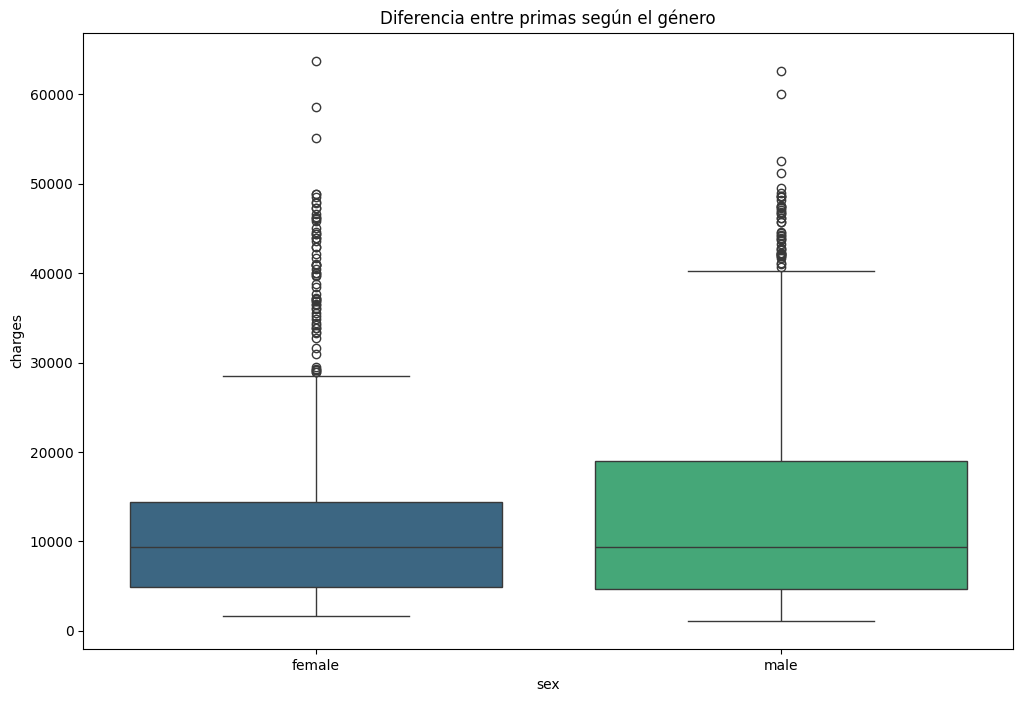

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=insurance_df['sex'], y=insurance_df['charges'], palette='viridis', hue=insurance_df['sex'])
plt.title('Diferencia entre primas según el género')
plt.show()

**Observaciones**

- El promedio para el grupo de male (13956.751) es mayor que female (12569.579).
- Ambos grupos muestran tener una mediana bastante similar, lo que señala que la distribución central de datos es parecida.
- El IQR para female es un poco más compacto (4885.159 - 14454.692), lo que indica una menor variabilidad en los datos comparado con el grupo de male (4619.134-18989.59). Esto se puede soportar con la desviación estándar (std), donde male (12971.026) presenta una mayor dispersión que female (11128.704).

Se puede apreciar que existe diferencia entre ambos grupos, donde los hombres presentan, en promedio, los charges más altos y con una mayor variabilidad con respecto a las mujeres.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

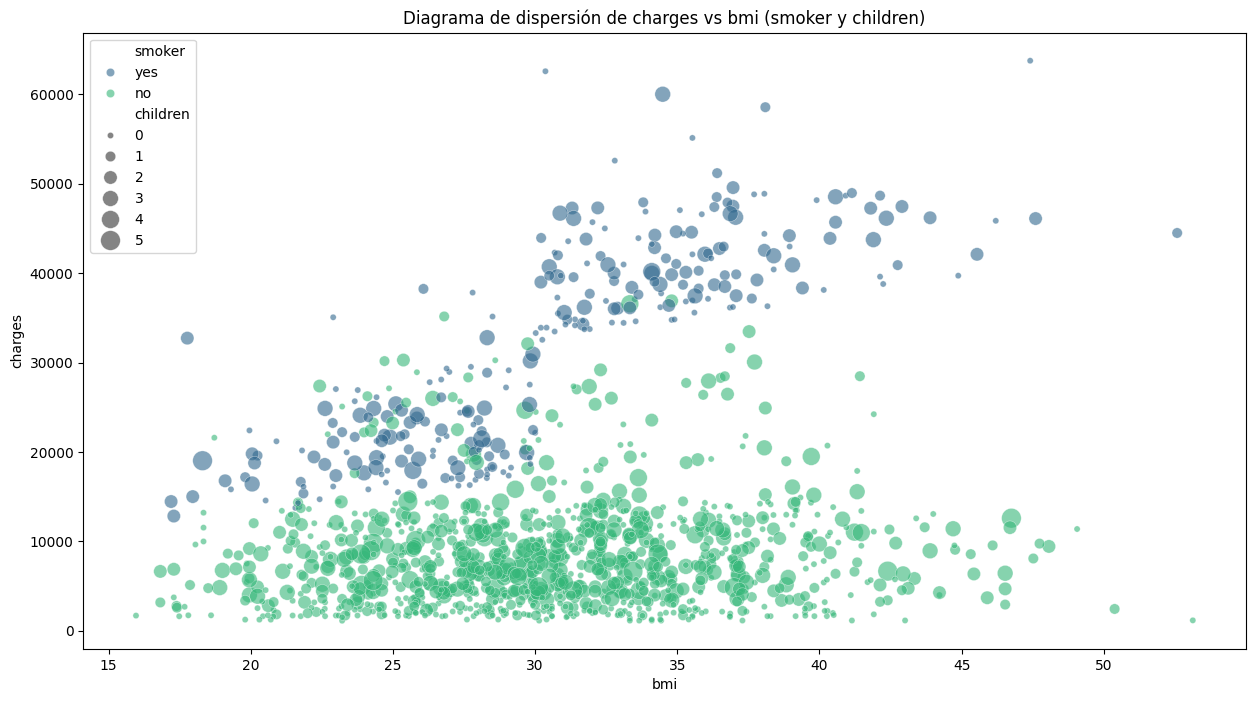

In [15]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='bmi', y='charges', data=insurance_df, hue='smoker', size='children', palette='viridis', alpha=0.6, sizes=(20, 200))
plt.title('Diagrama de dispersión de charges vs bmi (smoker y children)')
plt.show()

**Observaciones**

**Fumadores (`smoker`)**:
- Existe una diferencia notable entre las personas que fuman y las que no, siendo que los fumadores presentan las primas más altas. Lo anterior, puede sugerir que fumar es un factor que influye sobre el aumento de las primas, debido al riesgo elevado de presentar problemas de salud.

**BMI (`bmi`)**:
- Conforme el BMI crece, se puede visualizar que charges tiende a crecer. Esto podría señalar que también es una variable que puede influir sobre el aumento de las primas, lo cual es congruente al estar vinculado con problemas asociados con el sobrepeso y la obesidad.

**Número de hijos (`children`)**:
- En la gráfica, se puede apreciar que no hay una influencia fuerte del número de hijos sobre el comportamiento de los cargos. El tamaño del círculo representa la cantidad de número de hijos. Como se puede apreciar, no existe una concentración de estos, es decir, a lo largo del rango de charges se puede apreciar individuos tanto con pocos hijos así como con muchos.


**¿Hay alguna conclusión importante que se derive del gráfico?**

- En conclusión, se puede apreciar que tanto `smoker`y `bmi`son factores importantes sobre el comportamiento de los cargos, debido al impacto que pueden tener sobre la salud pública.
- El hábito de fumar está relacionado con primas más elevadas, mientras que el BMI influye en ambas categorías (fumador y no fumador).

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

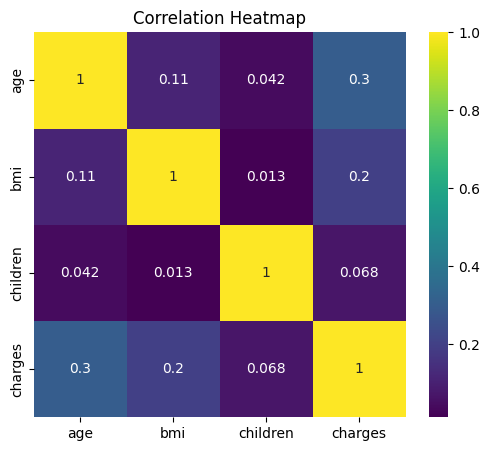

In [16]:
numeric_cols = insurance_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(6, 5))
correlation = insurance_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

**Observaciones**
A grandes rasgos, se aprecia que no existe una correlación tan fuerte entre las variables; no obstante, se puede destacar lo siguiente:
- `charges` y `age`(~0.3): Sugiere una correlación moderada, donde a medida que aumenta la edad, puede que la prima del seguro crezca.
- `charges` y `bmi` (~0.2): Con una correlación positiva baja, sugiere que a medida que el BMI es mayor, la prima puede que también lo sea.
- `charges` y `children` (~0.068): Un valor muy bajo refleja que no existe un impacto significativo sobre el valor de los cargos.
- `bmi` y `age` (~0.11): Muestra una relación positiva muy débil. Esto es razonable; sin embargo, en este dataset, el bmi parece tener mayor influencia por factores asociados al estilo de vida.

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [17]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [18]:
outliers[['age', 'bmi']].mean()

,0
age,41.079137
bmi,35.564604


In [19]:
print(f"Promedio de edad en outliers: {outliers['age'].mean():.3f}")
print(f"Promedio de bmi en outliers: {outliers['bmi'].mean():.3f}")

Promedio de edad en outliers: 41.079
Promedio de bmi en outliers: 35.565


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

**Mujeres y Hombres**

In [20]:
outliers['sex'].value_counts(normalize=True) * 100

,proportion
sex,
male,64.028777
female,35.971223


In [21]:
print(f"Porcentaje de hombres en outliers: {outliers['sex'].value_counts(normalize=True)['male']*100:.3f}%")
print(f"Porcentaje de mujeres en outliers: {outliers['sex'].value_counts(normalize=True)['female']*100:.3f}%")

Porcentaje de hombres en outliers: 64.029%
Porcentaje de mujeres en outliers: 35.971%


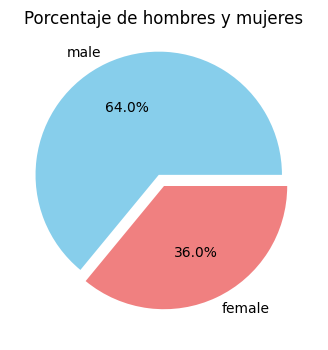

In [22]:
plt.figure(figsize=(4, 4))
explode = (0.1, 0)
colors = ['skyblue', 'lightcoral']
outliers['sex'].value_counts().plot.pie(autopct='%1.1f%%', explode=explode, colors=colors, ylabel='')
plt.title('Porcentaje de hombres y mujeres')
plt.show()

---

**Fumadores y No fumadores**

In [23]:
outliers['smoker'].value_counts(normalize=True) * 100

,proportion
smoker,
yes,97.841727
no,2.158273


In [24]:
print(f"Porcentaje de fumadores en outliers: {outliers['smoker'].value_counts(normalize=True)['yes']*100:.3f}%")
print(f"Porcentaje de no fumadores en outliers: {outliers['smoker'].value_counts(normalize=True)['no']*100:.3f}%")

Porcentaje de fumadores en outliers: 97.842%
Porcentaje de no fumadores en outliers: 2.158%


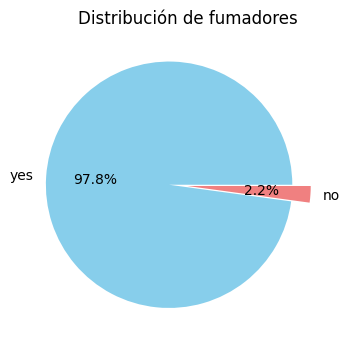

In [25]:
plt.figure(figsize=(4, 4))
explode = (0.15, 0)
colors = ['skyblue', 'lightcoral']
outliers['smoker'].value_counts().plot.pie(autopct='%1.1f%%', explode=explode, colors=colors, ylabel='')
plt.title('Distribución de fumadores')
plt.show()

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [26]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

In [27]:
print("Predictores: ", X.columns)
print("Variable de salida: ", y.name)

Predictores:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Variable de salida:  charges


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

In [29]:
print(f"Porcentaje de entrenamiento: {len(X_train)/len(X)*100:.2f}%")
print(f"Porcentaje de prueba: {len(X_test)/len(X)*100:.2f}%")

Porcentaje de entrenamiento: 79.97%
Porcentaje de prueba: 20.03%


*Analiza los diagramas de barras obtenidos en el ejercicio 1c.

Los registros obtenidos para el entrenamiento muestran que la mayoria
de ellos estan cercanos a la mediana de cada atributo

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [30]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

preprocessing = make_column_transformer(
    (MinMaxScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include=object)),
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('lr_model', LinearRegression())
    ]
)
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d417d9d03a0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d417d9d2a70>)])),
                ('lr_model', LinearRegression())])

In [32]:
from sklearn.metrics import root_mean_squared_error, r2_score
y_pred = lr_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.3f}')
print(f'R2: {r2:.3f}')

RMSE: 5701.986
R2: 0.754


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [33]:
y = np.where(y > upper_bound, upper_bound, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

In [34]:
lr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('lr_model2', LinearRegression())
    ]
)
lr_model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d417d9d03a0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d417d9d2a70>)])),
                ('lr_model2', LinearRegression())])

In [35]:
y_pred2 = lr_model2.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f'RMSE: {rmse:.3f}')
print(f'R2: {r2:.3f}')

RMSE: 4814.447
R2: 0.764


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [36]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# num_pipeline = make_pipeline(StandardScaler())
# cat_pipeline = make_pipeline(OrdinalEncoder())

preprocessing2 = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object)),
)

In [37]:
lr_model3 = Pipeline(steps=[
    ('preprocessing2', preprocessing2),
    ('lr_model3', LinearRegression())
    ]
)
lr_model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d412e6eeaa0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d412e6eeb90>)])),
                ('lr_model3', LinearRegression())])

In [38]:
y_pred3 = lr_model3.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print(f'RMSE: {rmse:.3f}')
print(f'R2: {r2:.3f}')

RMSE: 4811.601
R2: 0.764


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

Best degree 2 with RMSE 4285.5703109655615 and R2 score 0.8126404302016093


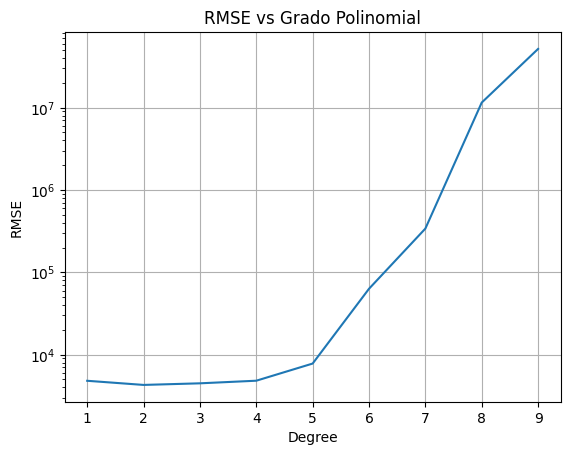

In [39]:
from sklearn.preprocessing import PolynomialFeatures

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_reg_model = make_pipeline(
        preprocessing2,
        PolynomialFeatures(degree=deg, include_bias=False),
        LinearRegression()
        )
    poly_reg_model.fit(X_train, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(X_test)

    poly_reg_rmse = root_mean_squared_error(y_test, poly_reg_y_predicted)
    rmses.append(poly_reg_rmse)
    r2 = r2_score(y_test, poly_reg_y_predicted)

    # Revisar resultados del grado del polinomio
    if min_rmse > poly_reg_rmse:
        min_rmse = poly_reg_rmse
        min_deg = deg
        max_r2 = r2
        lr_model4= poly_reg_model

# Graficación y presentación de resultados
print('Best degree {} with RMSE {} and R2 score {}'.format(min_deg, min_rmse, max_r2))

plt.plot(degrees, rmses)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Grado Polinomial')
plt.grid()
plt.show()